# Homework 3 for Applied Data Science
**Name:** Cheng Hou

**NetID:** ch3019

## Q1. P-values and hypothesis testing

### Five

Because there are five regressors' p-values that are less than $\alpha = 0.05$.

## Q2. Confidence intervals

### abd
a: The confidence interval [-5, 5] does not contain 10.

c: The confidence interval [9, 100] is not symmetrical.

d: For a t-distribution, the distance between left side of 99%-confidence interval and the center is not the twice as the distance between left side of 95%-confidence interval and the center. In the option, the distance between 8 and 10 is twice as the distance between 9 and 10. It can not be true.

## Q3. Car Price Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as st
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm

np.random.seed(229)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
url = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'
data_1 = pd.read_excel(url)
data_1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### (a)

In [3]:
lm = smf.ols(formula = 'Price ~ Mileage + Make + Cylinder + Liter + Doors + Cruise + Sound + Leather', 
             data = data_1).fit()
lm.params

Intercept            15716.548028
Make[T.Cadillac]     16271.601560
Make[T.Chevrolet]    -2237.339586
Make[T.Pontiac]      -1779.018129
Make[T.SAAB]         14639.425548
Make[T.Saturn]       -2311.623043
Mileage                 -0.180351
Cylinder              -215.017490
Liter                 4760.418023
Doors                -1710.056939
Cruise                -503.847862
Sound                  -44.078438
Leather                 25.458769
dtype: float64

#### The expected price E(X) is 4760.418023.

### (b)

In [4]:
key = 'Liter'
st.t.sf(x =4500, df = lm.df_resid, loc = lm.params[key], scale = lm.bse[key])

0.7142783923418341

#### the probability that X > \$ 4500 is 0.2857216076581659.

### (c)

In [5]:
key = 'Liter'
st.t.interval(0.9, lm.df_resid, loc = lm.params[key], scale = lm.bse[key])

(4002.9481807923521, 5517.8878655819717)

#### The two-sided 90% confidence interval of X is (4002.9481807923521, 5517.8878655819717).

### (d)

In [6]:
key = 'Liter'
st.t.ppf(0.1, lm.df_resid, loc = lm.params[key], scale = lm.bse[key])

4170.4505072009406

#### the one-sided 90% confidence interval of X is [4170.4505072009406, +$\infty$)

## Q4. Dimension reduction using PCA

In [7]:
digits = load_digits()
X = digits.data
y = digits.target
data_2 = pd.DataFrame(np.concatenate((y.reshape(len(y),1),X), axis = 1))
data_2.columns = ["y"] + ["x{}".format(i) for i in range(1,65)]
data_2.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


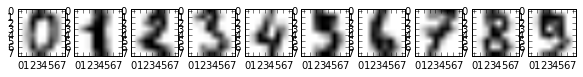

In [8]:
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap = plt.cm.gray_r)
plt.show()

### Part One. (a)

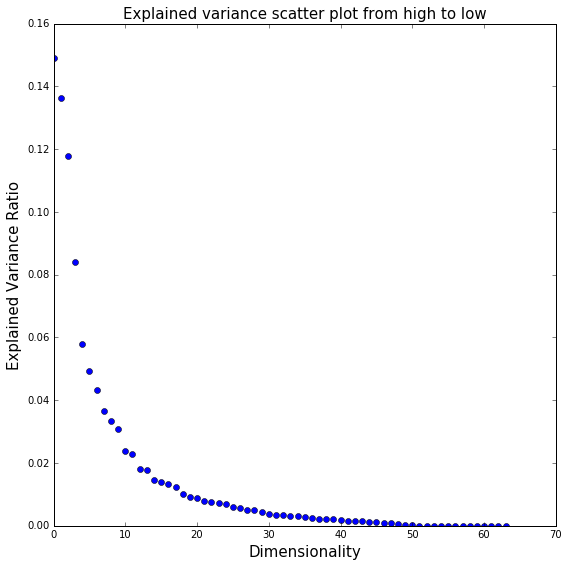

In [9]:
n = 64
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_

plt.figure(figsize = (9, 9))
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality", fontsize = 15)
plt.ylabel("Explained Variance Ratio", fontsize = 15)
plt.title("Explained variance scatter plot from high to low", fontsize = 15)
plt.show()

### Part One. (b)

In [10]:
np.sum(np.var(X, 0))

1201.4787373626168

#### The total variance of X is 1201.4787373626168.

In [11]:
v = 0
for i in range(n):
    v += eigenvalues[i]
    if v > 0.9:
        break
print (i + 1)

21


#### We need to choose 21 eigenvectors(directions) if we want to preserve 90% variance of the original data.

### Part Two.

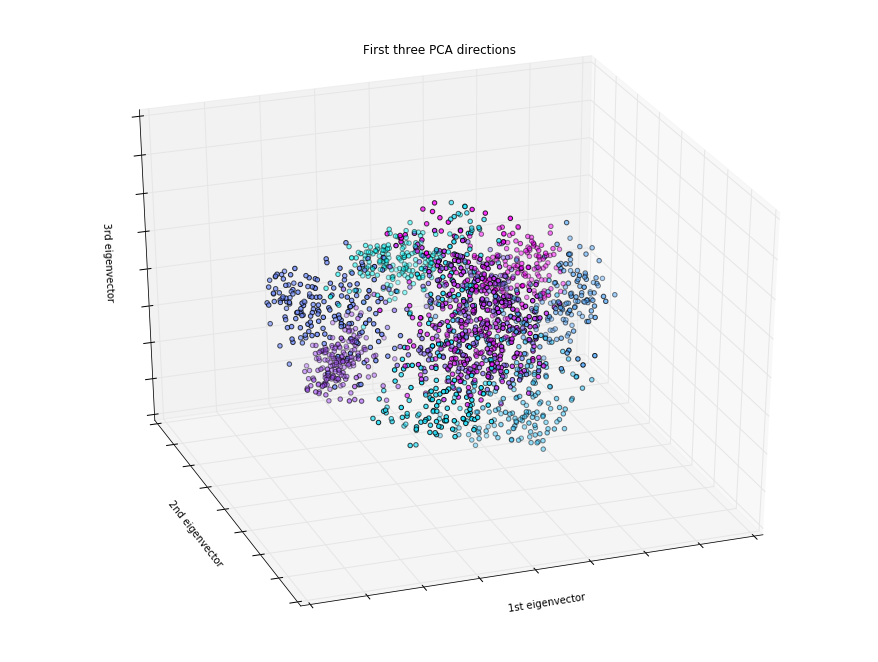

In [12]:
fig = plt.figure(1, figsize=(12, 9))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y,
           cmap=plt.cm.cool)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Part three.

In [13]:
data1 = data_2[(data_2.y == 3) | (data_2.y == 8)]
data1.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
8,8.0,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
13,3.0,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,...,6.0,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0
18,8.0,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
23,3.0,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0


### Part three. (a)

In [14]:
X1 = np.asarray(data1.iloc[:,1:])

In [15]:
pca1 = PCA(n)
Xproj1 = pca1.fit_transform(X1)
eigenvalues1 = pca1.explained_variance_ratio_

eigenvalues1[:2].sum()

0.36228178439510617

####  The percentage of total variance that the first and second eigenvectors could explain is 0.36228178439510617.

### Part three. (b)

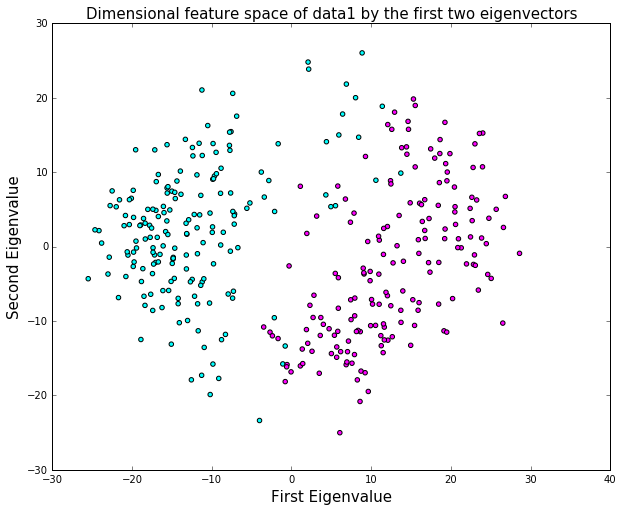

In [16]:
plt.figure(2, figsize = (10, 8))
plt.clf()
plt.scatter(Xproj1[:, 0], Xproj1[:, 1], c = data1.y, cmap = plt.cm.cool)
plt.xlabel('First Eigenvalue', fontsize = 15)
plt.ylabel('Second Eigenvalue', fontsize = 15)
plt.title('Dimensional feature space of data1 by the first two eigenvectors', fontsize = 15)
plt.show()

### Part three. (c)

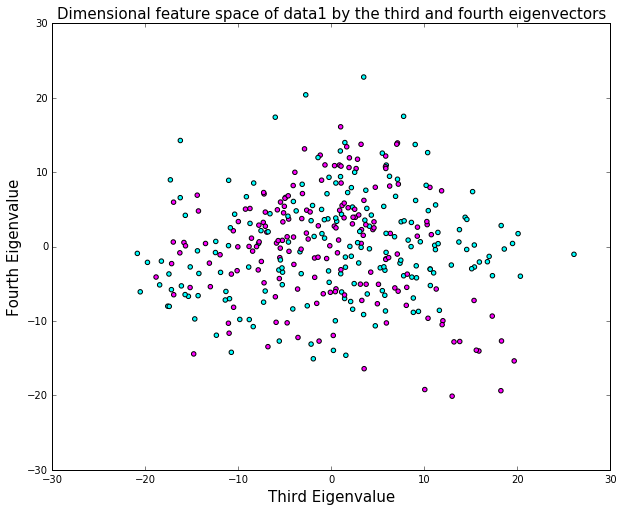

In [17]:
plt.figure(2, figsize = (10, 8))
plt.clf()
plt.scatter(Xproj1[:, 2], Xproj1[:, 3], c = data1.y, cmap = plt.cm.cool)
plt.xlabel('Third Eigenvalue', fontsize = 15)
plt.ylabel('Fourth Eigenvalue', fontsize = 15)
plt.title('Dimensional feature space of data1 by the third and fourth eigenvectors', fontsize = 15)
plt.show()

### Part three. (d)

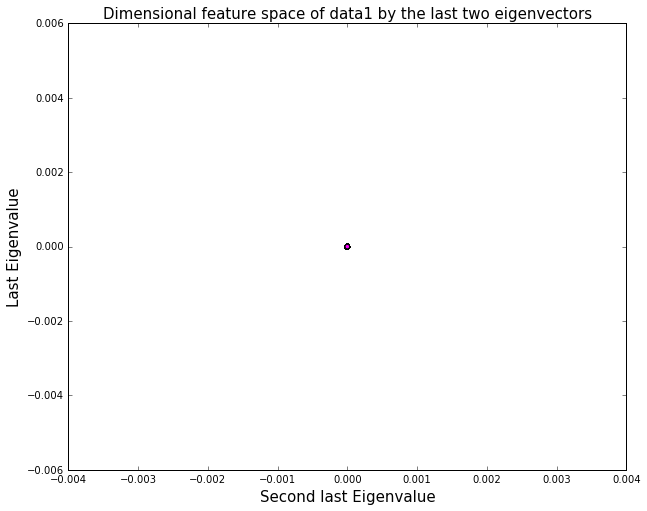

In [18]:
plt.figure(2, figsize = (10, 8))
plt.clf()
plt.scatter(Xproj1[:, -2], Xproj1[:, -1], c = data1.y, cmap = plt.cm.cool)
plt.xlabel('Second last Eigenvalue', fontsize = 15)
plt.ylabel('Last Eigenvalue', fontsize = 15)
plt.title('Dimensional feature space of data1 by the last two eigenvectors', fontsize = 15)
plt.show()

## Q5.

In [19]:
data_3 = pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data_3.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


### Q5. A

In [20]:
x_3 = data_3.iloc[:,1:]
y_3 = np.asarray(data_3.Y)

In [21]:
res = sm.OLS(y_3, x_3).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        22:56:19   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.0

### Q5. B

In [22]:
def ISOS(x, y):
    R_IS=[]
    R_OS=[]

    m = 1000
    for i in range(m):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    
        res=LinearRegression(fit_intercept=False)
        res.fit(X_train,y_train)
        R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
        R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
    print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
    print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

In [23]:
ISOS(x_3, y_3)

IS R-squared for 64 times is 0.807079623771
OS R-squared for 64 times is 0.279979723586


### Q5. C

In [24]:
xflag = []
alpha = 0.05
for i in res.pvalues.index:
    if res.pvalues[i] < alpha:
        xflag.append(i)
xflag

['x8', 'x13', 'x14']

In [25]:
x_c = data_3.loc[:, xflag]
res_c = sm.OLS(y_3, x_c).fit()
print (res_c.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.1933
Date:                Sun, 23 Oct 2016   Prob (F-statistic):              0.900
Time:                        22:56:21   Log-Likelihood:                -100.68
No. Observations:                  50   AIC:                             207.4
Df Residuals:                      47   BIC:                             213.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x8             0.0054      0.046      0.116      0.9

#### Based on the p values in summary table in Q5. A, we select x8, x13, x14.

In [26]:
ISOS(x_c, y_3)

IS R-squared for 64 times is 0.00956560851538
OS R-squared for 64 times is -0.260553006684


### Q5. D

In [27]:
n = 15
pca_3 = PCA(n)
Xproj_3 = pca_3.fit_transform(x_3)
eigenvalues_3 = pca_3.explained_variance_ratio_

In [28]:
res_d = sm.OLS(y_3, Xproj_3).fit()
print res_d.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           5.31e-09
Time:                        22:56:23   Log-Likelihood:                -57.896
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      35   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0200      0.004      5.321      0.0

In [29]:
ISOS(Xproj_3, y_3)

IS R-squared for 15 times is 0.851212394763
OS R-squared for 15 times is 0.436855024004


## Extra-credit assignment
### EC1 "Real" out of sample test.

In [30]:
def ISOSreal(x, y):
    R_IS=[]
    R_OS=[]

    m = 100
    for i in range(m):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
        pca_ec1 = PCA(15)
        Xproj_train = pca_ec1.fit_transform(X_train)
        Xproj_test = pca_ec1.fit_transform(X_test)
        eigenvalues_3 = pca_ec1.explained_variance_ratio_
    
        res=LinearRegression(fit_intercept=False)
        res.fit(Xproj_train, y_train)
        R_IS.append(1-((np.asarray(res.predict(Xproj_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
        R_OS.append(1-((np.asarray(res.predict(Xproj_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
    print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
    print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

In [31]:
ISOSreal(x_3, y_3)

IS R-squared for 15 times is 0.840406966855
OS R-squared for 15 times is -1.00704608715


### EC2. When PCA could not work?

#### If the two dimensional feature space has no correlationship with each other, for example, totally random, the PCA will not work.

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

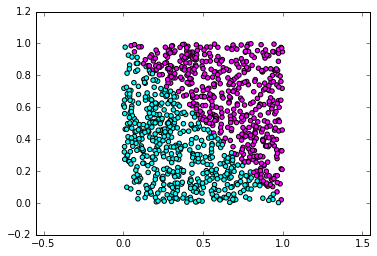

In [32]:
fl = 1000
xe1 = np.random.rand(fl)
xe2 = np.random.rand(fl)
f = lambda x: 0 if x <= 1 else 1
ff = np.vectorize(f)
ye = ff(xe1 + xe2)
plt.scatter(xe1, xe2, c = ye, cmap = plt.cm.cool)
plt.axis('equal')

In [33]:
Xe = pd.DataFrame([xe1, xe2]).T
ISOS(Xe, ye)

IS R-squared for 15 times is 0.509878397836
OS R-squared for 15 times is 0.506413142512


In [34]:
pcae = PCA(2)
Xproje = pcae.fit_transform(Xe)
eigenvaluese = pcae.explained_variance_ratio_

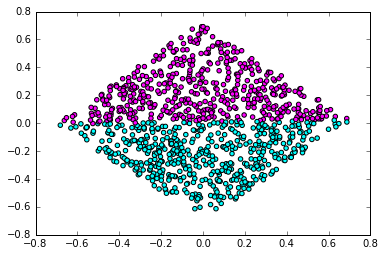

In [35]:
plt.scatter(Xproje[:,0], Xproje[:,1], c = ye, cmap = plt.cm.cool)

In [36]:
ISOS(Xproje, ye)

IS R-squared for 15 times is -0.285501149414
OS R-squared for 15 times is -0.294081237897


#### As we can see from the plot and the OS and IS R-squared, the PCA could not work.

### EC3. Multiple choice

#### BD
A. This situation is not always happen. "out of sample" $R^2$ may be negative.

B. This situation does may happen.

C. This situation is not always happen. There is no certain relationship.

D. This situation does may happen.